# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



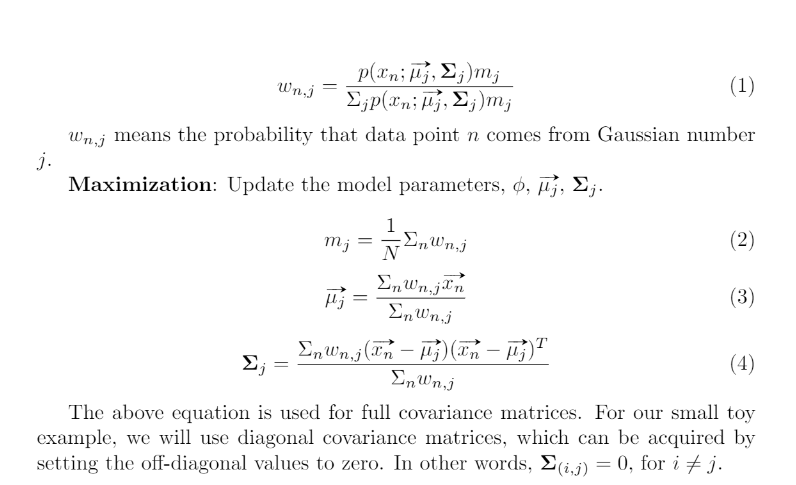

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [2]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params

        # Initiailize iteration.
        self.n_iter = 0

    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """
        
        w = np.zeros((len(data), len(self.mixture_weight)))
        for i in range(len(data)):
            for j in range(len(self.mixture_weight)):
                w[i, j] = self.mixture_weight[j] * multivariate_normal(self.mean_params[j], self.cov_params[j]).pdf(data[i])
        w = w / np.sum(w, axis=1)[:, np.newaxis]
        return w
        
        
    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """

        mixture_number = len(self.mixture_weight)
        updated_mixture_weight = np.zeros(mixture_number)
        updated_mean_params = np.zeros((mixture_number, len(self.mean_params[0])))
        updated_cov_params = np.zeros((mixture_number, len(self.cov_params[0]), len(self.cov_params[0])))
        
        for j in range(mixture_number):
            for i in range(len(data)):
                updated_mixture_weight[j] += w[i, j]
                updated_mean_params[j] += w[i, j] * data[i]
            updated_mixture_weight[j] = updated_mixture_weight[j] / len(data)
            updated_mean_params[j] = updated_mean_params[j] / np.sum(w[:, j])
            for i in range(len(data)):
                updated_cov_params[j] += w[i, j] * (data[i] - updated_mean_params[j]) * (data[i] - updated_mean_params[j]).T
            updated_cov_params[j] = updated_cov_params[j] / np.sum(w[:, j])
        
        updated_cov_params = updated_cov_params * np.eye(len(self.cov_params[0]))

        self.mixture_weight = updated_mixture_weight
        self.mean_params = updated_mean_params
        self.cov_params = updated_cov_params
        

    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """

        mixture_number = len(self.mixture_weight)
        log_prob = 0
        for i in range(len(data)):
            prob = 0
            for j in range(mixture_number):
                prob += self.mixture_weight[j] * multivariate_normal(self.mean_params[j], self.cov_params[j]).pdf(data[i])
            log_prob += np.log(prob)
        
        return log_prob

    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):

            # TODO: Perform EM step.

            # Estimation step.
            
            w = self.estimation_step(data)
            self.maximization_step(data, w)


            # Calculate log prob.
            log_prob = self.get_log_likelihood(data)
            log_prob_list.append(log_prob)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_iteration()
            self.n_iter += 1
        return log_prob_list

In [3]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1] * num_mixture # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1, 1]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.45757242 0.20909425 0.33333333]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[4.53619412 0.        ]
  [0.         4.28700611]]

 [[0.51645579 0.        ]
  [0.         0.13152618]]

 [[4.66666668 0.        ]
  [0.         2.88888891]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.40711618 0.25954961 0.33333421]
mu :
 [[ 6.27176215  6.27262711]
 [ 1.72091544  2.14764812]
 [-3.99998589 -4.6666488 ]]
covariance matrix :
 [[[2.94672736 0.        ]
  [0.         2.93847196]]

 [[0.49649261 0.        ]
  [0.         0.12584815]]

 [[4.66673088 0.        ]
  [0.         2.88900236]]]
-------------------------------------------------------------
Iteration

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



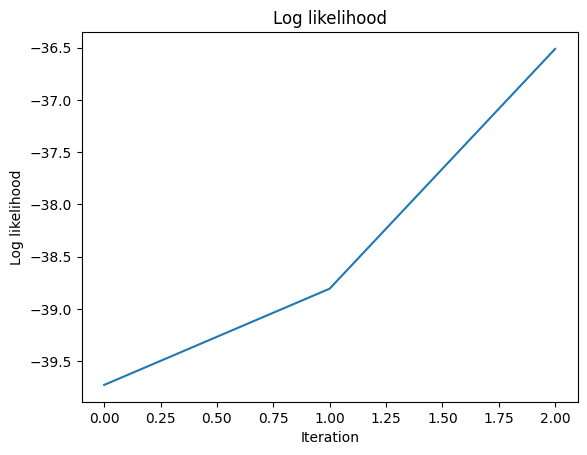

In [4]:
# TODO
# Plot log likelihood.
plt.plot(log_prob_list)
plt.xlabel('Iteration')
plt.ylabel('Log likelihood')
plt.title('Log likelihood')
plt.show()

ANS : Yes, the log likelihood goes up every iteration.

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



In [5]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list2 = gmm2.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]

 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.66669436 0.33330564]
mu :
 [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]
covariance matrix :
 [[[6.91944755 0.        ]
  [0.         5.89275124]]

 [[4.66806942 0.        ]
  [0.         2.89103318]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.66669453 0.33330547]
mu :
 [[ 4.49961084  4.66619903]
 [-3.99993206 -4.66651141]]
covariance matrix :
 [[[6.91946372 0.        ]
  [0.         5.8927741 ]]

 [[4.66807754 0.        ]
  [0.         2.89104566]

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

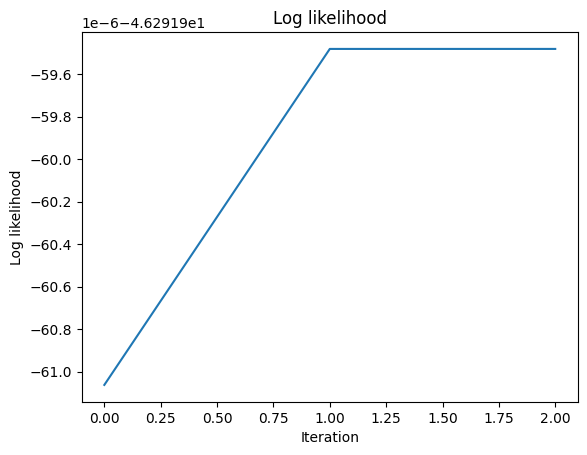

In [6]:
# TODO: Plot log_likelihood from T3
plt.plot(log_prob_list2)
plt.xlabel('Iteration')
plt.ylabel('Log likelihood')
plt.title('Log likelihood')
plt.show()

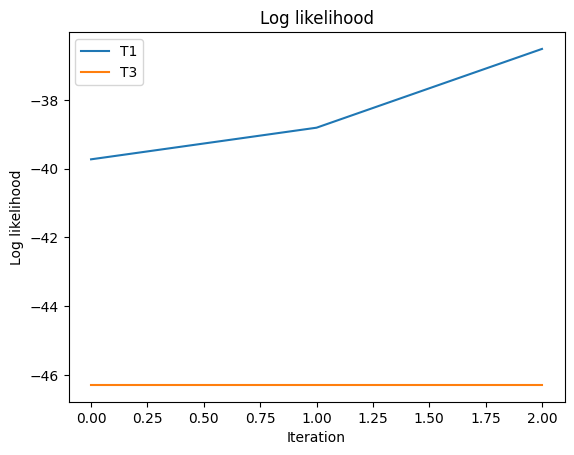

In [7]:
# TODO: Plot Comparision of log_likelihood from T1 and T3
plt.plot(log_prob_list, label='T1')
plt.plot(log_prob_list2, label='T3')
plt.xlabel('Iteration')
plt.ylabel('Log likelihood')
plt.title('Log likelihood')
plt.legend()
plt.show()

ANS : The model's log-likelihood given the data after each EM step is higher for 3 than 2 mixtures.

### OT1. Using 2 mixtures, initialize your Gaussian with means (0,0) and (10000,10000). Explain what happens. From this case, explain how a proper initialization should be performed. What other tricks can be used to prevent this from happening?

In [8]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[0,0], [10000, 10000]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm3 = GMM(mixture_weight, mean_params, cov_params)
try:
    log_prob_list3 = gmm3.perform_em_iterations(data, num_iterations)
except Exception as e:
    print("Error: ", e)

Initialization
m :
 [1, 1]
mu :
 [[    0.     0.]
 [10000. 10000.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Error:  array must not contain infs or NaNs


/tmp/ipykernel_31263/4216098364.py:43: RuntimeWarning: invalid value encountered in divide
  updated_mean_params[j] = updated_mean_params[j] / np.sum(w[:, j])


ANS : When the means are initialized with (0,0) and (10000,10000), when we calculate w_{n, j} in the estimation step, w_{n, 1} will be 0, and in the maximization step, when we try to update the mean and cov will divide by 0 and return NaN. The proper initialization should be performed by using the means that are close to your data.

# The face database

In [9]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip facedata_mat.zip

In [10]:
!pip -q install scikit-image

In [11]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

(40, 10)

### Preprocess xf

In [12]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

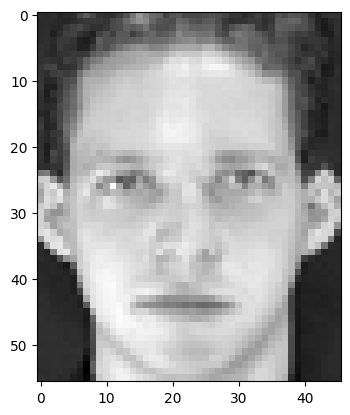

In [13]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [14]:
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


Euclidean distance between xf[0,0] and xf[0,1] is 10.038


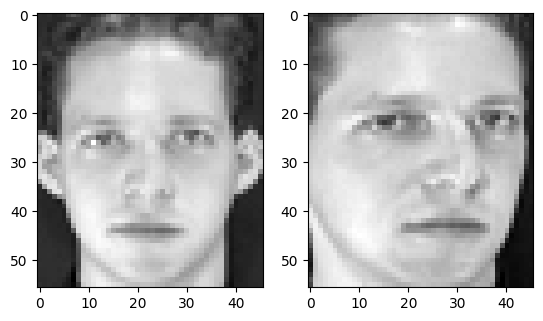

In [15]:
# TODO: Show why does the numbers make sense
print(f'Euclidean distance between xf[0,0] and xf[0,1] is {L2_dist(xf[0,0], xf[0,1]):.3f}')
plt.subplot(1,2,1)
plt.imshow(xf[0,0], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(xf[0,1], cmap = 'gray')
plt.show()

Euclidean distance between xf[0,0] and xf[1,0] is 8.173


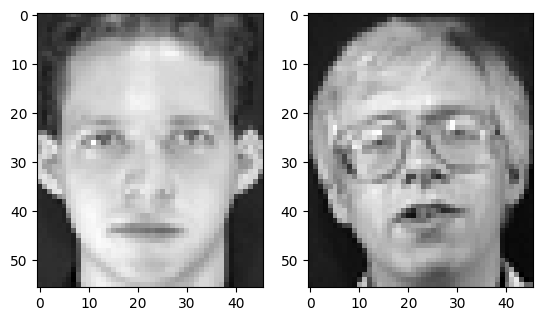

In [16]:
print(f'Euclidean distance between xf[0,0] and xf[1,0] is {L2_dist(xf[0,0], xf[1,0]):.3f}')
plt.subplot(1,2,1)
plt.imshow(xf[0,0], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(xf[1,0], cmap = 'gray')
plt.show()

ANS : The Euclidean distance between xf[0,0] and xf[0,1] is more than the distance between xf[0,0] and xf[1,0] even though xf[0,0] and xf[0,1] are the same person. Because xf]0,0] and xf[0,1] are different orientations, but xf[0,0] and xf[1,0] are the same orientations. So, The numbers make sense if you want to measure the similarity between two images in pixels. The numbers will also be useful for face verification when the image in the same settings(e.g. orientations).

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [17]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """

    people_index, image_index, image_shape_0, image_shape_1 = matrix.shape
    reshaped_matrix = matrix.reshape((people_index * image_index, image_shape_0 * image_shape_1))
    
    return reshaped_matrix


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """

    # INSERT CODE HERE
    similarity_matrix = np.zeros((len(A), len(B)))
    for i in range(len(A)):
        for j in range(len(B)):
            similarity_matrix[i, j] = L2_dist(A[i], B[j])

    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

In [18]:
#TODO: Show similariry matrix between T and D.

T = organize_shape(xf[:, :3])
D = organize_shape(xf[:, 3:])

similarity_matrix = generate_similarity_matrix(T, D)


### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


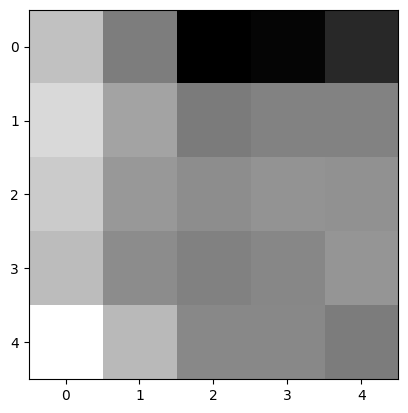

In [19]:
# INSERT CODE HERE
plt.imshow(similarity_matrix[5:10,5:10], cmap='gray')
plt.show()

ANS : The black square between [5:10,5:10] suggests that the pictures from person number 2 are similar to each other. The patterns from person number 1 say that the images from person 1 are not similar to each other.

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [20]:
def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """

    # INSERT CODE HERE
    tp = 0
    fp = 0
    fn = 0
    tn = 0

    test_images = similarity_matrix.shape[1]
    train_feat = 3
    test_feat = 7
    people = 40


    for i in range(test_images):
        for j in range(people):
            test_idx = i // test_feat
            sim_score = np.sum(similarity_matrix[j*train_feat: (j + 1)*train_feat, i] <= threshold)
            if j == test_idx:
                if sim_score > 0:
                    tp += 1
                else:
                    fn += 1
            else:
                if sim_score > 0:
                    fp += 1
                else:
                    tn += 1
    true_pos_rate = tp / (tp + fn)
    false_pos_rate = fp / (fp + tn)
    return true_pos_rate, false_pos_rate
# Quick check
# (true_pos_rate, false_pos_rate) should be (0.9928571428571429, 0.33507326007326005)
evaluate_performance(similarity_matrix, 9.5)

(0.9928571428571429, 0.33507326007326005)

In [21]:
evaluate_performance(similarity_matrix, 10)

(0.9964285714285714, 0.4564102564102564)

        ANS:

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [22]:
def calculate_roc(input_mat, N = 1000):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_pos_rate from the given matrix.
    """

    # INSERT CODE HERE
    tpr_list = []
    far_list = []

    min_val = np.min(input_mat)
    max_val = np.max(input_mat)
    for threshold in np.linspace(min_val, max_val, N):
        tpr, far = evaluate_performance(input_mat, threshold)
        tpr_list.append(tpr)
        far_list.append(far)
    return tpr_list, far_list

def plot_roc(input_mat, plot_eer = False, recall_point = -1, show=True):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    tpr_list, far_list = calculate_roc(input_mat)
    

    # Find EER
    min_diff = 2e9
    eer = (None, None)
    for (x, y) in zip(far_list, tpr_list):
        diff = np.abs(1 - y - x)
        if diff < min_diff:
            min_diff = diff
            eer = (x, y)
    
    

    # Find False alarm rate
    far = (None, None)
    min_diff = 2e9
    if recall_point != -1:
        for (x, y) in zip(far_list, tpr_list):
            diff = np.abs(x - recall_point)
            if diff < min_diff:
                far = (x, y)
                min_diff = diff
    if show:
        plt.plot(far_list, tpr_list, label='RoC')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('RoC Curve')
        if plot_eer:
            plt.axvline(x=eer[0], color='r', linestyle='--', label='ERR')
            plt.plot([1.0, 0.0], label='ERR Line')
        if recall_point != -1:
            plt.axvline(x=far[0], color='g', linestyle='--', label='FAR')
        plt.legend()
        plt.show()
    return eer, far

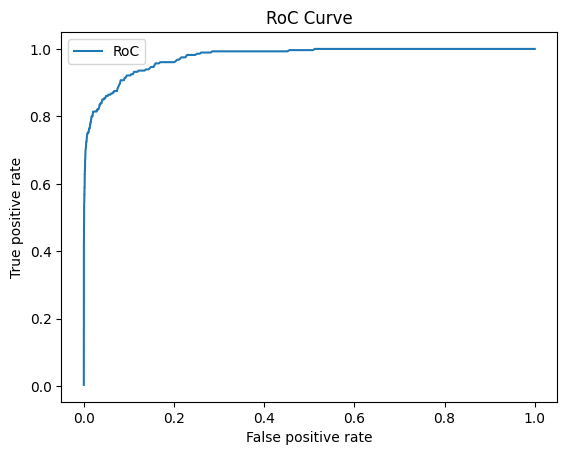

In [23]:
# INSERT CODE HERE
_, _ = plot_roc(similarity_matrix)

    ANS:

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



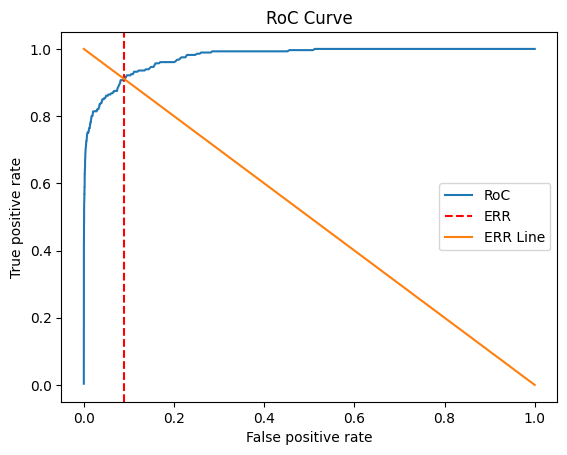

Equal Error Rate: 0.9071428571428571


In [24]:
# You can add more parameter(s) to the function in the previous question.

# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.
eer, _ = plot_roc(similarity_matrix, True)
print(f'Equal Error Rate: {eer[1]}')

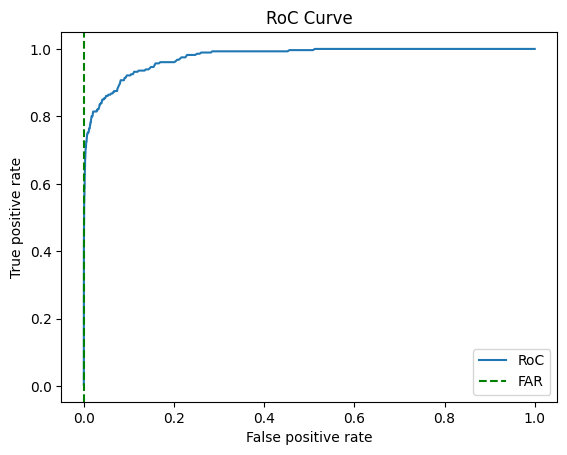

False alarm rate: 0.5428571428571428


In [25]:
_, far = plot_roc(similarity_matrix, recall_point=0.001)
print(f'False alarm rate: {far[1]}')

    ANS:

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

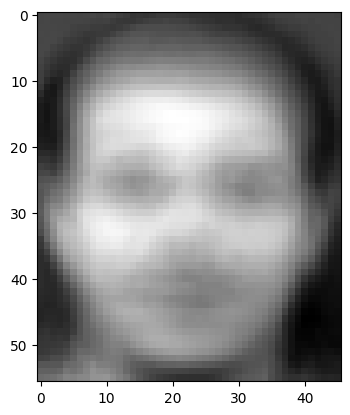

In [26]:
# INSERT CODE HERE
_, _, image_shape0, image_shape1 = xf.shape
meanface = np.mean(T, axis=0)

plt.imshow(meanface.reshape((image_shape0, image_shape1)), cmap='gray')
plt.show()

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [27]:
# TODO: Find the size and the rank of the covariance matrix.

cov_matrix = np.cov((T-meanface).T)

In [28]:
cov_size = cov_matrix.shape
cov_rank = np.linalg.matrix_rank(np.cov(T.T))
cov_size, cov_rank

((2576, 2576), 119)

    ANS:


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [29]:
# TODO: Compute gram matrix.
gram_matrix = np.dot((T-meanface), (T-meanface).T)

In [30]:
# TODO: Show size and rank of Gram matrix.
gram_size = gram_matrix.shape
gram_rank = np.linalg.matrix_rank(gram_matrix)
gram_size, gram_rank

((120, 120), 119)

In [31]:
(gram_matrix==gram_matrix.T).all()

True

ANS:
- 120 x 120 is the size of the Gram matrix.
- 119 is the rank of Gram matrix.
- we expect to get 119 non-zero eigenvalues.


## T14. Is the Gram matrix also symmetric? Why?


ANS: Yes, the Gram matrix also symmetric. Because if we find the transpose of $X^TX$ then we will get $(X^TX)^T = X^T(X^T)^T = X^TX$ since $(AB)^T = B^TA^T$

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [32]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    idx = eigenvalues.argsort()[::-1]

    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

In [33]:
non_zero_eigenvalues = len(eigenvalues[eigenvalues > 1e-9])
zero_eigenvalues = eigenvalues[eigenvalues <= 1e-9][0]

non_zero_eigenvalues, zero_eigenvalues

(119, 7.282990792494878e-15)

    ANS:

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

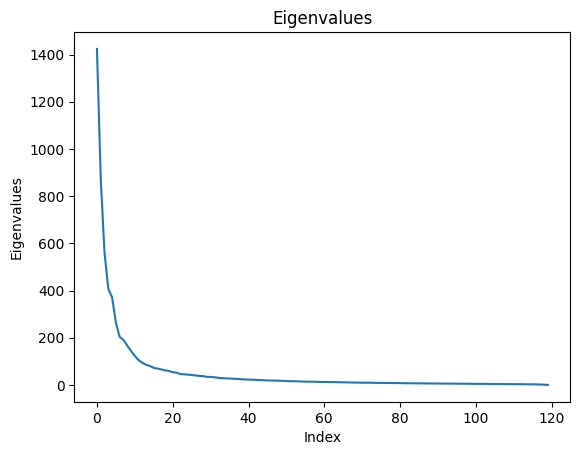

In [34]:
# INSERT CODE HERE
# INSERT CODE HERE
plt.plot(eigenvalues)
plt.xlabel('Index')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues')
plt.show()

In [35]:
sum_eigenvalues = np.sum(eigenvalues)

pct = 0.95
variance_to_keep = sum_eigenvalues * pct

total_variance = 0
cnt = 0
for i in range(len(eigenvalues)):
    total_variance += eigenvalues[i]
    cnt += 1
    if total_variance >= variance_to_keep:
        break
cnt

64

    ANS:

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [36]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE

v = np.dot((T-meanface).T, eigenvectors)

v = v / np.linalg.norm(v, axis=0)

In [37]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

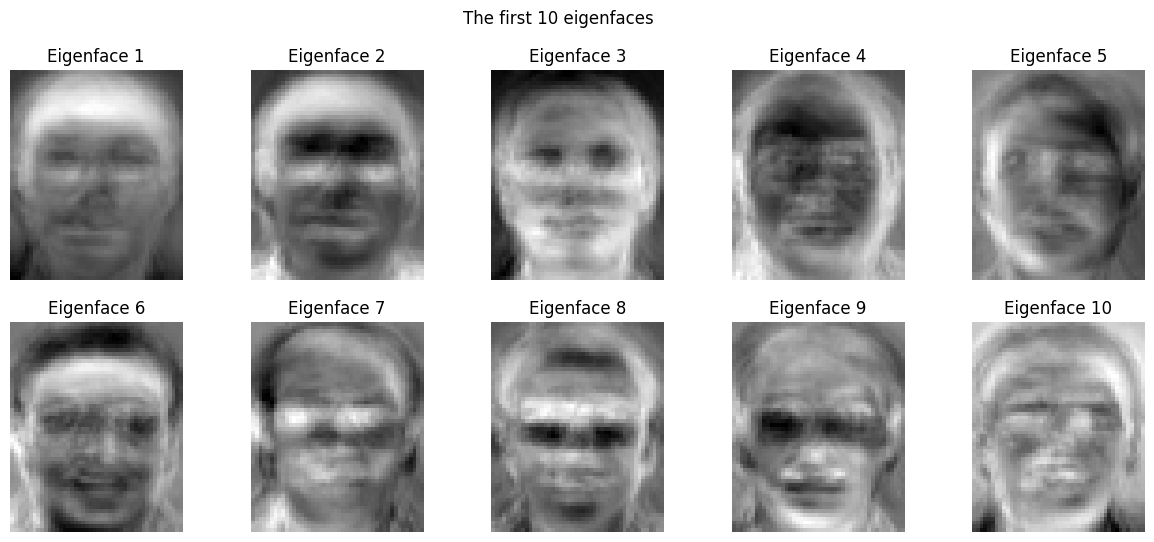

In [38]:
# TODO: Show the first 10 eigenvectors as images.
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(v[:, i].reshape(image_shape0, image_shape1), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Eigenface {i+1}')
fig.suptitle("The first 10 eigenfaces")
plt.show()

### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

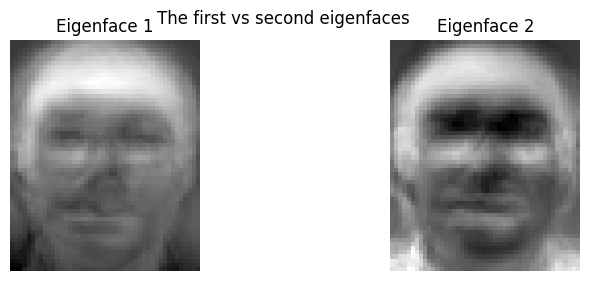

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))
for i in range(2):
    ax = axes[i]
    ax.imshow(v[:, i].reshape(image_shape0, image_shape1), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Eigenface {i+1}')
fig.suptitle("The first vs second eigenfaces")
plt.show()

    ANS:

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [40]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """

    # INSERT CODE HERE
    projection_vectors = np.dot((matrix-meanface), v)

    return projection_vectors

In [41]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 10
T_reduced = calculate_projection_vectors(T, meanface, v)[:, :k]
D_reduced = calculate_projection_vectors(D, meanface, v)[:, :k]


def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

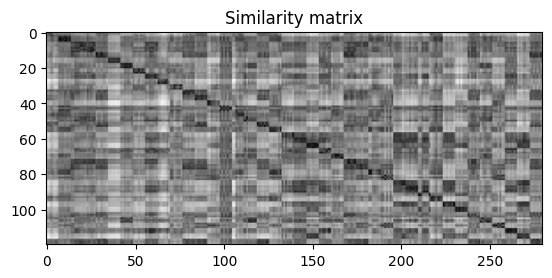

In [42]:
# TODO: Get similarity matrix of T_reduced and D_reduced

similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)

plt.imshow(similarity_matrix, cmap='gray')
plt.title('Similarity matrix')
plt.show()

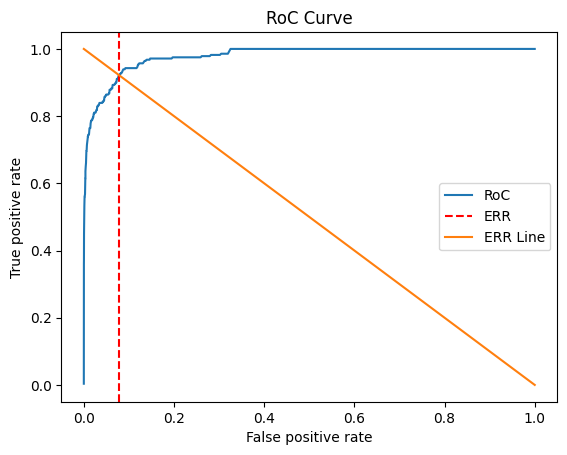

Equal Error Rate: 0.9214285714285714


In [43]:
# TODO: Find EER and the recall rate at 0.1% FAR.

eer, _ = plot_roc(similarity_matrix, True)
print(f'Equal Error Rate: {eer[1]}')

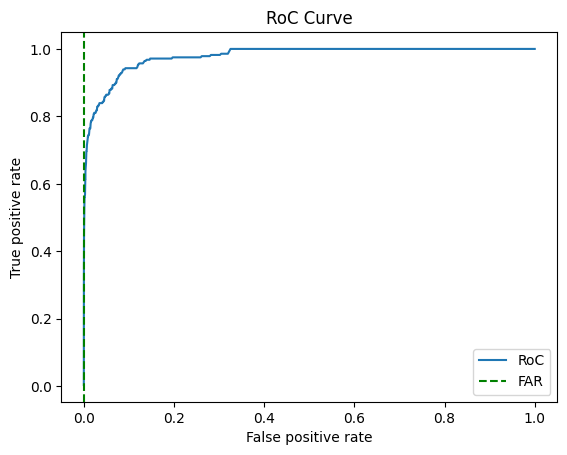

False alarm rate: 0.5178571428571429


In [44]:
_, far = plot_roc(similarity_matrix, recall_point=0.001)
print(f'False alarm rate: {far[1]}')

    ANS:

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


In [45]:
# INSERT CODE HERE
list_k = [5, 6, 7, 8, 9, 10, 11, 12, 13, 1]
max_eer = -2e9
best_k = -1
for k in list_k:
    T_reduced = calculate_projection_vectors(T, meanface, v)[:, :k]
    D_reduced = calculate_projection_vectors(D, meanface, v)[:, :k]
    similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)
    eer, _ = plot_roc(similarity_matrix, show=False)
    if eer[1] > max_eer:
        max_eer = eer[1]
        best_k = k
    print(f'Equal Error Rate: {eer[1]} at k = {k}')
print(f'Best k: {best_k} with EER: {max_eer}')

Equal Error Rate: 0.8928571428571429 at k = 5
Equal Error Rate: 0.9071428571428571 at k = 6


### OT2. Reconstruct the first image using this procedure. Use k = 10, what is the MSE?

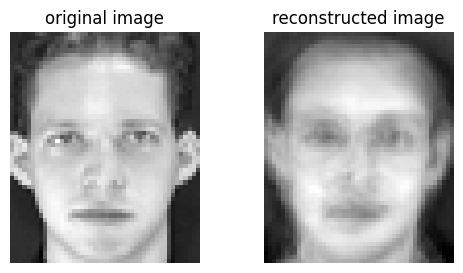

In [ ]:
k = 10
T_reduced = calculate_projection_vectors(T, meanface, v)[:, :k]

def recontruct(reduced, meanface, v, k):
    return np.dot(reduced, v[:, :k].T) + meanface

reconstructed = recontruct(T_reduced[0:1], meanface, v, k).reshape(image_shape0, image_shape1)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
ax = axes[0]
ax.imshow(xf[0, 0], cmap='gray')
ax.axis('off')
ax.set_title(f'original image')
ax = axes[1]
ax.imshow(reconstructed, cmap='gray')
ax.axis('off')
ax.set_title(f'reconstructed image')
plt.show()

In [ ]:
L2_dist(xf[0, 0], reconstructed)

3.9797124271075

ANS: 

### OT3. For k values of 1,2,3,...,10,119, show the reconstructed images. Plot the MSE values.

In [ ]:
list_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 199]
reconstructed_images = []
mse_values = []
for k in list_k:
    T_reduced = calculate_projection_vectors(T, meanface, v)[:, :k]
    reconstructed = recontruct(T_reduced[0:1], meanface, v, k).reshape(image_shape0, image_shape1)
    reconstructed_images.append((k, reconstructed))
    mse_values.append(L2_dist(xf[0, 0], reconstructed))

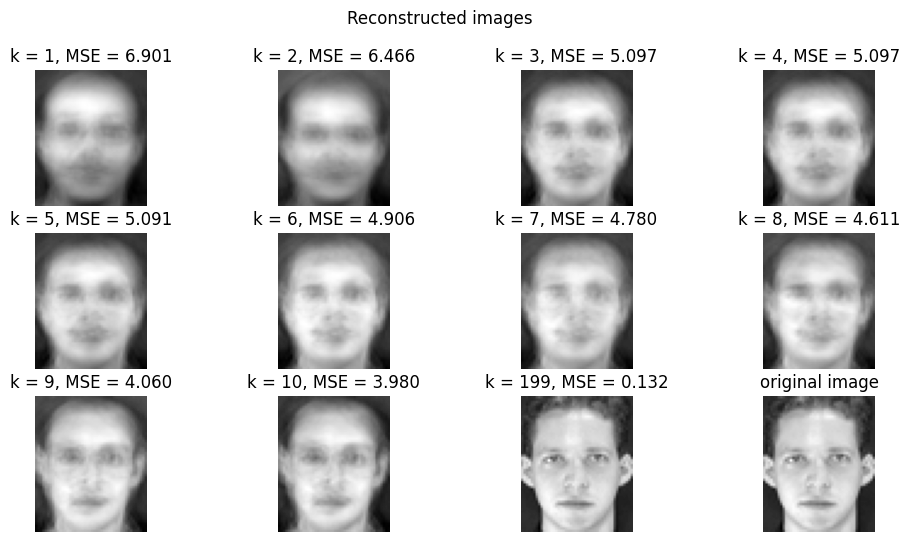

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 6))
for i in range(0, len(reconstructed_images)):
    ax = axes[i // 4, i % 4]
    ax.imshow(reconstructed_images[i][1], cmap='gray')
    ax.axis('off')
    ax.set_title(f'k = {reconstructed_images[i][0]}, MSE = {mse_values[i]:.3f}')
ax = axes[2, 3]
ax.imshow(xf[0, 0], cmap='gray')
ax.axis('off')
ax.set_title(f'original image')
fig.suptitle("Reconstructed images")
plt.show()

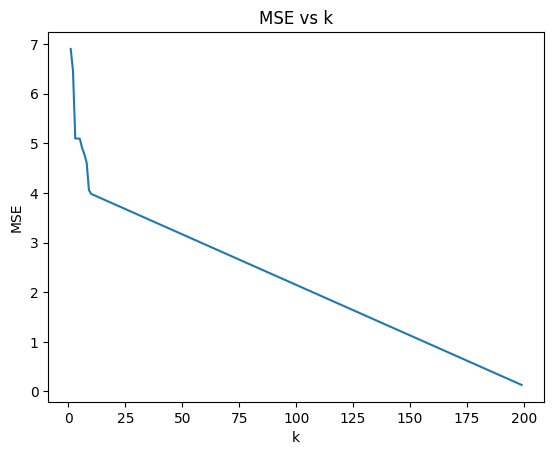

In [ ]:
plt.plot(list_k, mse_values)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE vs k')
plt.show()

### OT4. Consider if we want to store 1,000,000 images of this type. How much space do we need? If we would like to compress the database by using the first 10 eigenvalues, how much space do we need? (Assume we keep the projection values, the eigenfaces, and the meanface as 32bit floats)

In [ ]:
image_size = image_shape0 * image_shape1
no_images = 1_000_000
no_eigenvalues = 10
bits = 32
prjection_values_space = no_images * no_eigenvalues * bits
eigenfaces_space = no_eigenvalues * image_size * bits
meanface_space = image_size * bits

total_space = prjection_values_space + eigenfaces_space + meanface_space
total_space_mb = total_space / 8388608
print(total_space_mb) # Megabytes

38.25506591796875


    ANS:

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS:

In [ ]:
# TODO: Define dimension of PCA.
n_dim = 80

# TODO: Find PCA of T and D with n_dim dimension.
T_reduced = calculate_projection_vectors(T, meanface, v)[:, :n_dim]
D_reduced = calculate_projection_vectors(D, meanface, v)[:, :n_dim]

T_mean_by_person = np.mean(T_reduced.reshape(40, 3, -1), axis=1).reshape(40, 1, n_dim)
D_mean_by_person = np.mean(D_reduced.reshape(40, 7, -1), axis=1).reshape(40, 1, n_dim)

In [ ]:
mean_c = (T_reduced.reshape(40, 3, -1) - T_mean_by_person).reshape(T_reduced.shape[0], -1)
S_W = np.dot(mean_c.T, mean_c)
print(f"Rank of S_W: {np.linalg.matrix_rank(S_W)}")

Rank of S_W: 80


### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [ ]:
# TODO: Find the LDA projection.
mean_overall = np.mean(T_reduced, axis=0)
mean_diff = T_mean_by_person.reshape(40, -1) - mean_overall
S_B = np.dot(mean_diff.T, mean_diff)
print(f"Rank of S_B: {np.linalg.matrix_rank(S_B)}")

Rank of S_B: 39


In [ ]:
# Find eigenvalues and eigenvectors with numpy.linalg.eigh
S_W_inv = np.linalg.inv(S_W)
lda = np.dot(S_W_inv, S_B)
eigenvalues, eigenvectors = np.linalg.eigh(lda)

non_zero_eigenvalues = len(eigenvalues[eigenvalues > 1e-10])
zero_eigenvalues = eigenvalues[eigenvalues <= 1e-10][0]

non_zero_eigenvalues, zero_eigenvalues

(6, -31829555.373532247)

In [ ]:
(lda==lda.T).all()

False

In [ ]:
# Find eigenvalues and eigenvectors with numpy.linalg.eig

eigenvalues, eigenvectors = np.linalg.eig(np.dot(S_W_inv, S_B))

non_zero_eigenvalues = len(eigenvalues[eigenvalues > 1e-9])
zero_eigenvalues = eigenvalues[eigenvalues <= 1e-9][0]

non_zero_eigenvalues, zero_eigenvalues

(39, (1.2207669070514434e-11+2.6282363830293166e-10j))

ANS:

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

In [ ]:
# INSERT CODE HERE
k = 10
projection_vectors = np.dot(T_reduced, eigenvectors).T[:k].T
lda_reconstructed = np.dot(projection_vectors, eigenvectors[:, :k].T)
pca_reconstructed = recontruct(lda_reconstructed, meanface, v, n_dim)


(120, 10)

/tmp/ipykernel_1742/3605566699.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.imshow(pca_reconstructed[i].reshape(image_shape0, image_shape1).astype(float), cmap='gray')


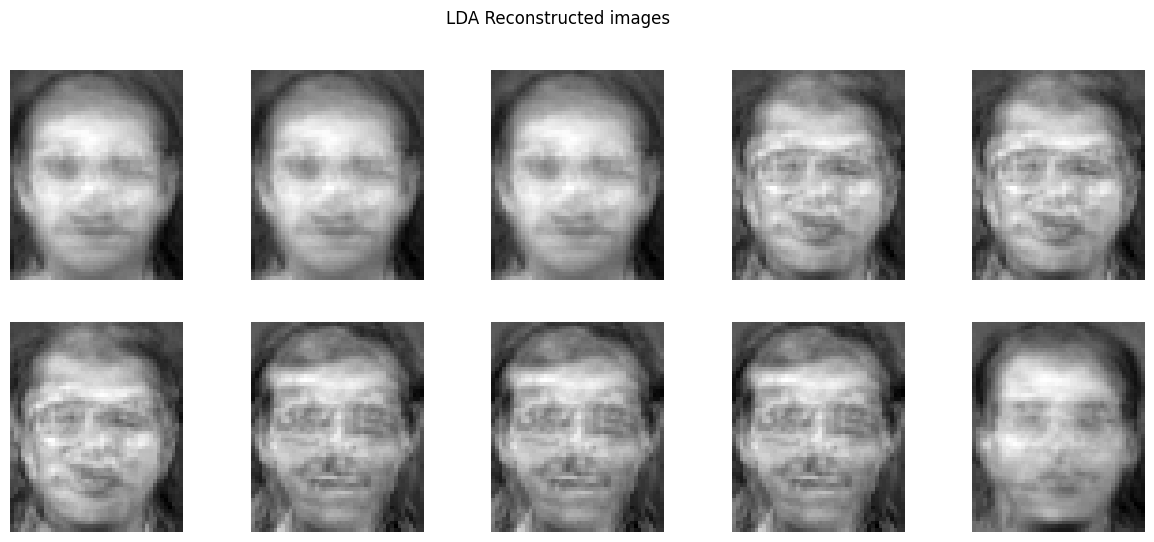

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(0, 10):
    ax = axes[i // 5, i % 5]
    ax.imshow(pca_reconstructed[i].reshape(image_shape0, image_shape1).astype(float), cmap='gray')
    ax.axis('off')
fig.suptitle('LDA Reconstructed images')
plt.show()

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

In [ ]:
# INSERT CODE HERE
projection_vectors_T = np.dot(T_reduced, eigenvectors).astype(float)
projection_vectors_D = np.dot(D_reduced, eigenvectors).astype(float)

similarity_matrix = generate_similarity_matrix(projection_vectors_T, projection_vectors_D)

plt.imshow(similarity_matrix, cmap='gray')
plt.title('Similarity matrix')
plt.show()

In [ ]:
# TODO: Find EER and the recall rate at 0.1% FAR.

eer, _ = plot_roc(similarity_matrix, True)
print(f'Equal Error Rate: {eer[1]}')

In [ ]:
_, far = plot_roc(similarity_matrix, recall_point=0.001)
print(f'False alarm rate: {far[1]}')

    ANS:

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

/tmp/ipykernel_1742/1822796973.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  projection_vectors_T = np.dot(T_reduced, eigenvectors).T[:k].T.astype(float)
/tmp/ipykernel_1742/1822796973.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  projection_vectors_D = np.dot(D_reduced, eigenvectors).T[:k].T.astype(float)


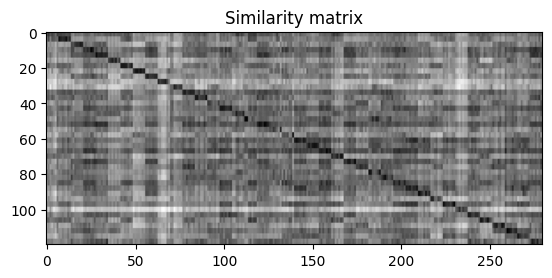

In [ ]:
# INSERT CODE HERE

    ANS:

### OT5. Plot the first two LDA dimensions of the test images from different people (6 people 7 images each). Use a different color for each person. Observe the clustering of between each person. Repeat the same steps for the PCA projections. Does it come out as expected?